In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

from keras.activations import *
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,LSTM,GRU,Bidirectional
from sklearn.metrics import classification_report,accuracy_score, precision_score, recall_score, f1_score ,confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/test_Y.csv
/kaggle/input/train_Y.csv
/kaggle/input/train_X.csv
/kaggle/input/test_X.csv
/kaggle/input/Hijja2.txt


In [5]:
x_train = pd.read_csv(r"/kaggle/input/train_X.csv",header=None)
y_train = pd.read_csv(r"/kaggle/input/train_Y.csv",header=None)

x_test = pd.read_csv(r"/kaggle/input/test_X.csv",header=None)
y_test = pd.read_csv(r"/kaggle/input/test_Y.csv",header=None)

print("x_train.shape =", x_train.shape, "\ny_train.shape =", 
      y_train.shape, "\nx_test.shape =", x_test.shape, "\ny_test.shape =", y_test.shape)

x_train.shape = (37933, 1024) 
y_train.shape = (37933, 1) 
x_test.shape = (9501, 1024) 
y_test.shape = (9501, 1)


In [6]:
x_train = x_train.iloc[:,:].values
x_test = x_test.iloc[:,:].values
y_train = y_train.iloc[:,:].values
y_test = y_test.iloc[:,:].values
print("x_train.shape =", x_train.shape, "\ny_train.shape =", 
      y_train.shape, "\nx_test.shape =", x_test.shape, "\ny_test.shape =", y_test.shape)

x_train.shape = (37933, 1024) 
y_train.shape = (37933, 1) 
x_test.shape = (9501, 1024) 
y_test.shape = (9501, 1)


In [7]:
x_train = x_train.reshape(-1,32,32,1)
x_test = x_test.reshape(-1,32,32,1)

x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train.shape, x_test.shape)

(37933, 32, 32, 1) (9501, 32, 32, 1)


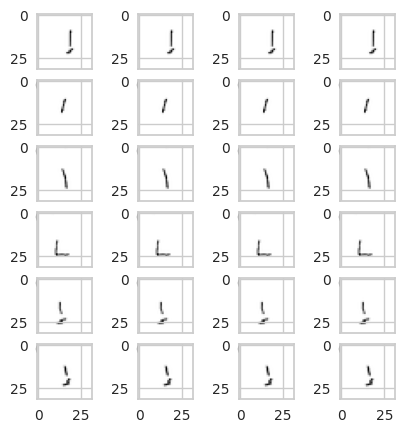

In [8]:
fig, ax = plt.subplots(6,4,figsize=(5,5))

for i in range(6):
    for j in range(4):
        ax[i,j].imshow(x_train[i+2])

In [9]:
total_classes = len(np.unique(y_train))+1
y_train = to_categorical(y_train,total_classes)
y_test = to_categorical(y_test, total_classes)

print(y_train.shape)
print(y_test.shape)

(37933, 30)
(9501, 30)


In [10]:
model = Sequential([
    
    
    Bidirectional(GRU(256, return_sequences=True, dropout=0.25), input_shape=(32,32)),
    Dense(256, activation='relu'),
    
    Bidirectional(GRU(128, return_sequences=True, dropout=0.5)),
    Dense(128, activation='relu'),
    
    Bidirectional(GRU(64, return_sequences=True, dropout=0.5)),
    Dense(64, activation='relu'),
    
    Bidirectional(GRU(32, return_sequences=True, dropout=0.5)),
    Dense(32, activation='relu'),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(total_classes, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 32, 512)           445440    
 al)                                                             
                                                                 
 dense (Dense)               (None, 32, 256)           131328    
                                                                 
 bidirectional_1 (Bidirecti  (None, 32, 256)           296448    
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 32, 128)           32896     
                                                                 
 bidirectional_2 (Bidirecti  (None, 32, 128)           74496     
 onal)                                                           
                                                        

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])

In [12]:
history = model.fit(x_train,y_train,
                    #steps_per_epoch=len(x_train)//128,
                    batch_size=128,
                    epochs=150,
                    validation_data=(x_test, y_test),
                   # validation_steps=50
                   )

Epoch 1/150
297/297 [==============================] - 30s 38ms/step - loss: 2.6288 - accuracy: 0.2146 - val_loss: 2.0094 - val_accuracy: 0.3746
Epoch 2/150
297/297 [==============================] - 9s 29ms/step - loss: 1.8379 - accuracy: 0.4189 - val_loss: 1.5105 - val_accuracy: 0.5170
Epoch 3/150
297/297 [==============================] - 9s 29ms/step - loss: 1.4722 - accuracy: 0.5290 - val_loss: 1.2060 - val_accuracy: 0.6091
Epoch 4/150
297/297 [==============================] - 9s 29ms/step - loss: 1.2895 - accuracy: 0.5886 - val_loss: 1.0727 - val_accuracy: 0.6541
Epoch 5/150
297/297 [==============================] - 9s 29ms/step - loss: 1.1551 - accuracy: 0.6320 - val_loss: 0.9590 - val_accuracy: 0.6961
Epoch 6/150
297/297 [==============================] - 9s 29ms/step - loss: 1.0413 - accuracy: 0.6687 - val_loss: 0.7925 - val_accuracy: 0.7509
Epoch 7/150
297/297 [==============================] - 9s 29ms/step - loss: 0.9888 - accuracy: 0.6864 - val_loss: 0.7898 - val_accuracy

In [13]:
y_held_pred=model.predict(x_test)

297/297 [==============================] - 5s 9ms/step


In [14]:
y_pred=np.argmax(y_held_pred, axis=1)
y_test_1=np.argmax(y_test, axis=1)

print(y_test_1.shape)
print(y_pred.shape)

(9501,)
(9501,)


In [15]:
model.evaluate(x_test,y_test)

297/297 [==============================] - 3s 11ms/step - loss: 0.6622 - accuracy: 0.8459


[0.6622302532196045, 0.8459109663963318]

In [16]:
his=model.evaluate(x_test, y_test, verbose=2);
print(his)

297/297 - 3s - loss: 0.6622 - accuracy: 0.8459 - 3s/epoch - 10ms/step
[0.6622302532196045, 0.8459109663963318]


In [17]:
y_held_pred_train=model.predict(x_train)

1186/1186 [==============================] - 11s 9ms/step


In [18]:
y_pred_train=np.argmax(y_held_pred_train, axis=1)
y_train_1=np.argmax(y_train, axis=1)

print(y_train_1.shape)
print(y_pred_train.shape)
model.evaluate(x_train, y_train, verbose=2);

(37933,)
(37933,)
1186/1186 - 11s - loss: 0.0822 - accuracy: 0.9729 - 11s/epoch - 10ms/step


<Axes: title={'center': 'Actual vs. Predicted'}, xlabel='Actual G*', ylabel='Predicted G*'>

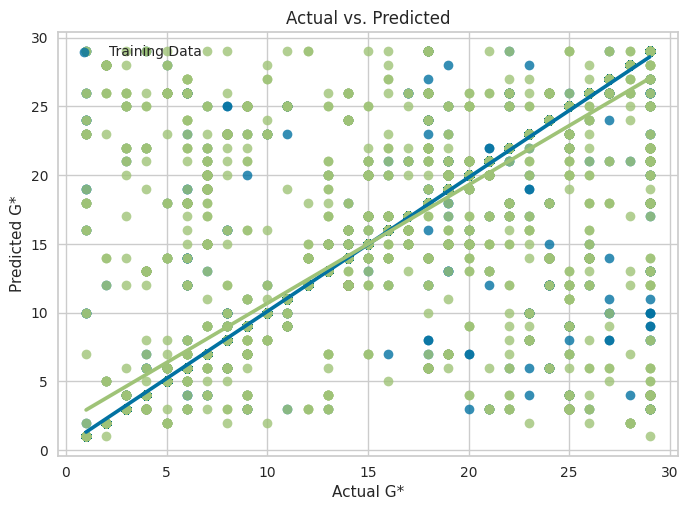

In [19]:
import seaborn as sns

sns.regplot(x=y_train_1,y=y_pred_train, label="Training Data")

plt.xlabel('Actual G*')
plt.ylabel('Predicted G*')
plt.title('Actual vs. Predicted')
plt.legend(loc="upper left")

sns.regplot(x=y_test_1,y=y_pred, label="Testing Data")

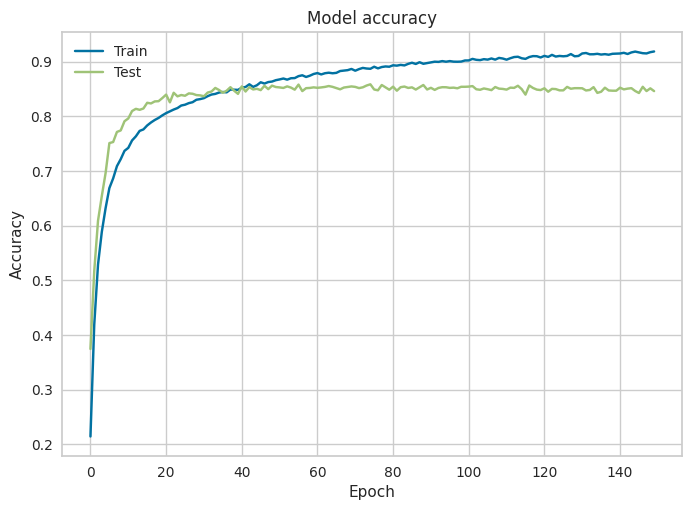

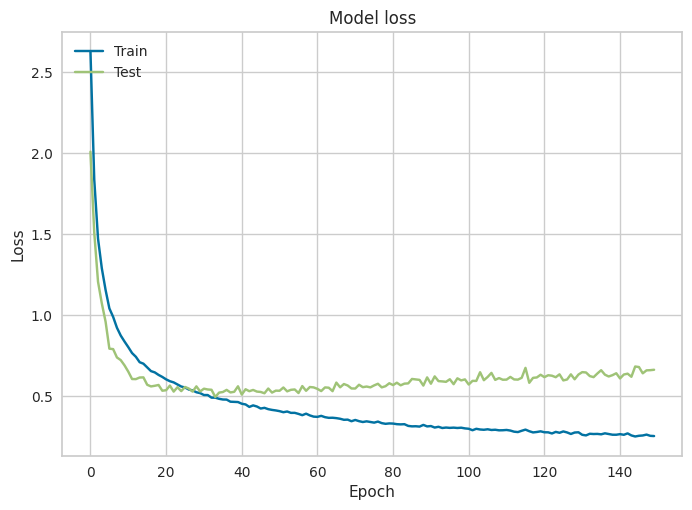

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [21]:
y_predicted = model.predict(x_test)
y_grand_truth = y_test
y_predicted = np.argmax(y_predicted,axis=1)
y_grand_truth = np.argmax(y_grand_truth,axis=1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_grand_truth, y_predicted)

297/297 [==============================] - 3s 10ms/step


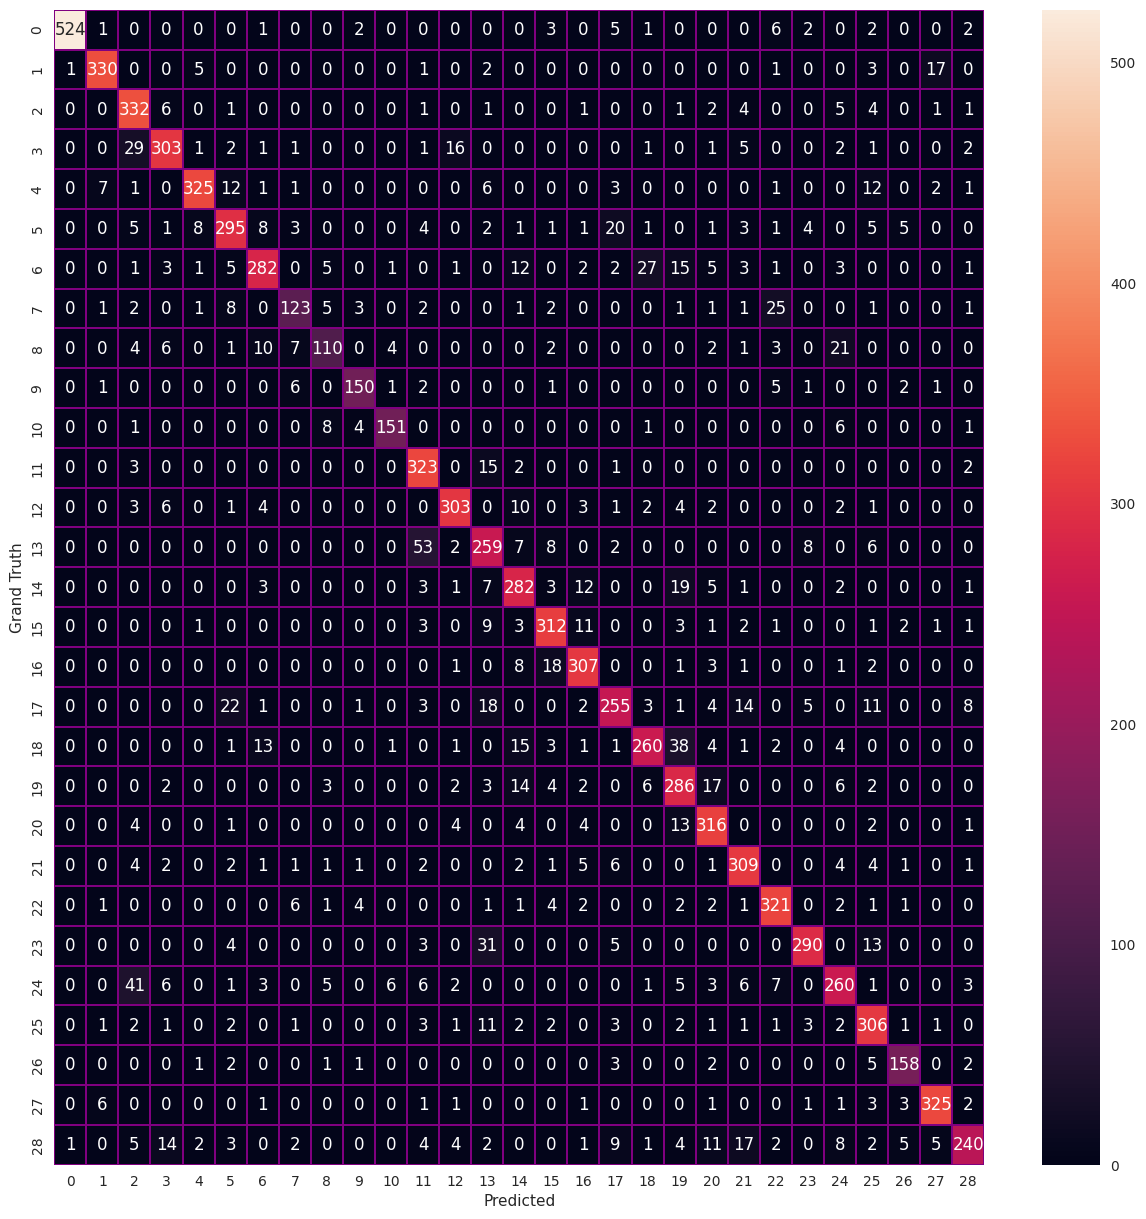

In [22]:
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cm,fmt=".0f", annot=True,linewidths=0.1, linecolor="purple", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Grand Truth")
plt.show()

In [23]:
scores = np.zeros((28,3))
def calc_F1(num):
  TP = cm[num,num]
  FN = np.sum(cm[num,:])-cm[num,num]
  FP = np.sum(cm[:,num])-cm[num,num]
  precision = TP/(TP+FP)
  recall = TP/(TP+FN)
  F1_score = 2*(recall * precision) / (recall + precision)
  return precision, recall, F1_score
for i in range(28):
   precision, recall, F1_score = calc_F1(i)
   scores[i,:] = precision, recall, F1_score
scores_frame = pd.DataFrame(scores,columns=["Precision", "Recall", "F1 Score"], index=[list(range(0, 28))])

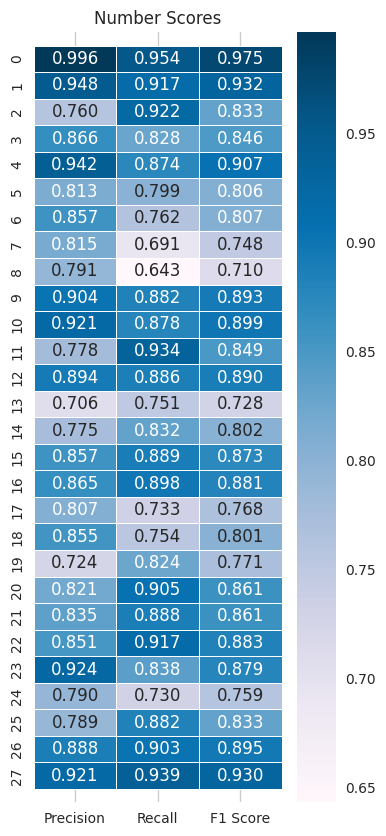

In [24]:
f, ax = plt.subplots(figsize = (4,10))
ax.set_title('Number Scores')
sns.heatmap(scores_frame, annot=True, fmt=".3f", linewidths=0.5, cmap="PuBu", cbar=True, ax=ax)
bottom, top = ax.get_ylim()
plt.ylabel("")
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [25]:
# Functions: Performance Evaluation 

def Performance(Model , y_predd): 
    
    # model accuracy
    accuracy = accuracy_score(y_test_1, y_predd)
    print( Model +' Accuracy:'+'\033[1m {:.2f}%'.format(accuracy*100))
    
    # model Classification Report
    print('\nClassification Report: '+'\033[0m')
    print('*' * 22)
    print(classification_report(y_test_1, y_predd))

In [26]:
Performance('Bi-LSTM' , y_pred)

Bi-LSTM Accuracy: 84.59%

Classification Report: 
**********************
              precision    recall  f1-score   support

           1       1.00      0.95      0.97       549
           2       0.95      0.92      0.93       360
           3       0.76      0.92      0.83       360
           4       0.87      0.83      0.85       366
           5       0.94      0.87      0.91       372
           6       0.81      0.80      0.81       369
           7       0.86      0.76      0.81       370
           8       0.81      0.69      0.75       178
           9       0.79      0.64      0.71       171
          10       0.90      0.88      0.89       170
          11       0.92      0.88      0.90       172
          12       0.78      0.93      0.85       346
          13       0.89      0.89      0.89       342
          14       0.71      0.75      0.73       345
          15       0.77      0.83      0.80       339
          16       0.86      0.89      0.87       351
        